In [1]:
from pycaret.datasets import get_data

In [2]:
#there is the list of available data
all_datasets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


In [3]:
dataset = get_data('bike')

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [4]:
dataset = dataset.sample(1000)

In [5]:
data = dataset.sample(frac=.9,random_state=123)
data_unseen = dataset.drop(data.index)

In [6]:
data.reset_index(drop=True,inplace=True)
data_unseen.reset_index(drop=True,inplace=True)

print('data for modeling :' +str(data.shape))
print('unseen data for predictions :'+str(data_unseen.shape))






data for modeling :(900, 15)
unseen data for predictions :(100, 15)


In [7]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,6649,10/9/2011,4,0,10,14,0,0,0,1,0.68,0.6364,0.47,0.1642,500
1,12662,6/16/2012,2,1,6,18,0,6,0,2,0.72,0.6515,0.37,0.2239,571
2,7982,12/4/2011,4,0,12,5,0,0,0,1,0.26,0.3030,0.81,0.0000,4
3,10107,3/2/2012,1,1,3,4,0,5,1,1,0.32,0.3485,0.61,0.0000,2
4,12301,6/1/2012,2,1,6,17,0,5,1,3,0.70,0.6515,0.70,0.2537,227


In [8]:
data.nunique()

instant       900
dteday        524
season          4
yr              2
mnth           12
hr             24
holiday         2
weekday         7
workingday      2
weathersit      3
temp           48
atemp          57
hum            75
windspeed      23
cnt           397
dtype: int64

In [9]:
data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [10]:
categoricals = ['season', 'yr', 'mnth', 'hr','holiday', 'weekday','workingday','weathersit' ]
numericals   = ['temp', 'atemp', 'hum', 'windspeed']
ignore       = ['instant','dteday']

In [11]:
from pycaret.regression import *

In [12]:
exp1=RegressionExperiment()
exp1.setup(data, ignore_features=ignore,  target='cnt', session_id=555, train_size=0.7, preprocess=False, categorical_features= categoricals, numeric_features=numericals)


,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(900, 13)"
5,Transformed train set shape,"(630, 13)"
6,Transformed test set shape,"(270, 13)"
7,Ignore features,2
8,Numeric features,4
9,Categorical features,8


In [13]:
exp2 = RegressionExperiment()
exp2.setup(data,ignore_features=ignore,target='cnt',session_id=555,train_size=.7,categorical_features=categoricals,numeric_features=numericals,preprocess=True,normalize=True,remove_outliers=True,ordinal_features=None)


,Description,Value
0,Session id,555
1,Target,cnt
2,Target type,Regression
3,Original data shape,"(900, 15)"
4,Transformed data shape,"(868, 58)"
5,Transformed train set shape,"(598, 58)"
6,Transformed test set shape,"(270, 58)"
7,Ignore features,2
8,Ordinal features,3
9,Numeric features,4


In [14]:
top3_exp1 =exp1.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,49.2757,6057.6082,77.0845,0.8123,0.5935,0.7365,0.1140
et,Extra Trees Regressor,52.3756,6275.6664,78.0728,0.8078,0.6223,0.8594,0.1980
lightgbm,Light Gradient Boosting Machine,51.0693,6484.3187,79.5060,0.7991,0.6476,0.7939,0.1290
rf,Random Forest Regressor,53.3608,7056.7362,82.7039,0.7822,0.5233,0.5988,0.2810
gbr,Gradient Boosting Regressor,61.8460,8298.0313,90.3968,0.7411,0.6993,0.9162,0.0770
knn,K Neighbors Regressor,66.4771,9811.0732,98.6017,0.6944,0.6366,0.8442,0.0230
dt,Decision Tree Regressor,67.6143,12610.3317,110.8221,0.6131,0.6484,0.6978,0.0110
ada,AdaBoost Regressor,97.2341,14170.3451,118.7053,0.5512,1.1037,2.7954,0.0720
lr,Linear Regression,107.8464,20229.1253,141.0239,0.3786,1.2008,3.0835,0.8650
llar,Lasso Least Angle Regression,108.1216,20308.4915,141.2432,0.3776,1.1849,3.0687,0.0120


In [15]:
top3_exp1

[XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cpu', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=555, ...),
 ExtraTreesRegressor(n_jobs=-1, random_state=555),
 LGBMRegressor(n_jobs=-1, random_state=555)]

In [16]:
top3_exp2 = exp2.compare_models(n_select=3)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,60.6092,8228.8927,89.6385,0.7420,0.7815,1.3378,0.4100
et,Extra Trees Regressor,60.3706,8975.5875,93.1938,0.7251,0.7706,1.2280,0.6430
gbr,Gradient Boosting Regressor,68.2432,9284.0400,95.4325,0.7090,0.8551,1.5807,0.3960
rf,Random Forest Regressor,71.7081,10379.2962,101.0632,0.6754,0.9594,2.0408,0.7020
lasso,Lasso Regression,79.4903,11813.9222,108.2950,0.6268,1.0073,2.4870,0.3100
llar,Lasso Least Angle Regression,79.4919,11814.2415,108.2964,0.6268,1.0074,2.4872,0.3770
br,Bayesian Ridge,79.6926,11874.3791,108.5826,0.6251,1.0163,2.4997,0.4130
ridge,Ridge Regression,80.4182,11971.7884,109.0345,0.6209,1.0653,2.6234,0.3230
knn,K Neighbors Regressor,74.7079,12200.4399,109.6249,0.6162,0.7424,1.1277,0.3400
huber,Huber Regressor,77.9931,12473.8715,111.0335,0.6061,0.9507,2.2794,0.3220


In [18]:
xnw = exp2.compare_models(n_select=8)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
xgboost,Extreme Gradient Boosting,60.6092,8228.8927,89.6385,0.7420,0.7815,1.3378,0.6600
et,Extra Trees Regressor,60.3706,8975.5875,93.1938,0.7251,0.7706,1.2280,0.6820
gbr,Gradient Boosting Regressor,68.2432,9284.0400,95.4325,0.7090,0.8551,1.5807,0.4450
rf,Random Forest Regressor,71.7081,10379.2962,101.0632,0.6754,0.9594,2.0408,0.7550
lasso,Lasso Regression,79.4903,11813.9222,108.2950,0.6268,1.0073,2.4870,0.3240
llar,Lasso Least Angle Regression,79.4919,11814.2415,108.2964,0.6268,1.0074,2.4872,0.3350
br,Bayesian Ridge,79.6926,11874.3791,108.5826,0.6251,1.0163,2.4997,0.3140
ridge,Ridge Regression,80.4182,11971.7884,109.0345,0.6209,1.0653,2.6234,0.3350
knn,K Neighbors Regressor,74.7079,12200.4399,109.6249,0.6162,0.7424,1.1277,0.3280
huber,Huber Regressor,77.9931,12473.8715,111.0335,0.6061,0.9507,2.2794,0.3350


In [19]:
xgboost = exp1.create_model('xgboost')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.0018,3758.3747,61.3056,0.8865,0.5075,0.5191
1,36.8450,3642.8429,60.3560,0.8550,0.6769,0.8609
2,52.1643,7224.6711,84.9981,0.7997,0.6896,0.9332
3,45.7195,5665.3274,75.2684,0.7781,0.5548,0.7064
4,51.4061,7638.4734,87.3984,0.8329,0.4752,0.5699
5,53.3470,6658.2799,81.5983,0.7921,0.6452,1.0225
6,49.0196,4950.8783,70.3625,0.8158,0.5864,0.6771
7,48.4646,5064.8407,71.1677,0.8353,0.6300,0.9826
8,51.5512,7002.2337,83.6794,0.7557,0.4271,0.4067


In [21]:
tune_xgboost = exp1.tune_model(xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.4806,3216.6901,56.7159,0.9029,0.6393,0.7751
1,33.9362,2829.6637,53.1946,0.8873,0.6915,0.8382
2,53.2781,6610.5681,81.3054,0.8167,0.7367,1.1089
3,45.7133,5733.8859,75.7224,0.7754,0.5873,0.7585
4,47.7432,6131.5154,78.3040,0.8658,0.5785,0.5796
5,53.3372,6304.9406,79.4037,0.8031,0.8316,1.2129
6,40.9460,3182.7310,56.4157,0.8816,0.5194,0.6099
7,48.4118,4314.5901,65.6855,0.8597,0.7451,1.0565
8,46.5836,4281.5601,65.4336,0.8506,0.5604,0.6348


Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [22]:
tune_xgboost

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.7, device='cpu', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=2, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=240, n_jobs=-1,
             num_parallel_tree=None, random_state=555, ...)

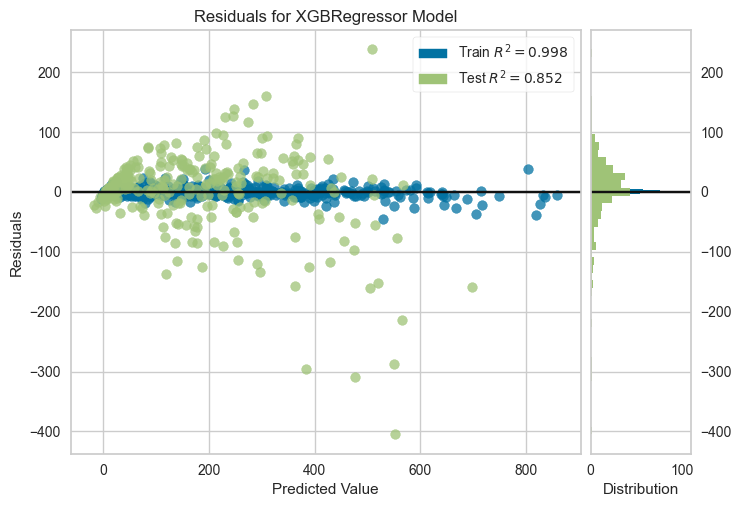

In [23]:
exp1.plot_model(tune_xgboost)

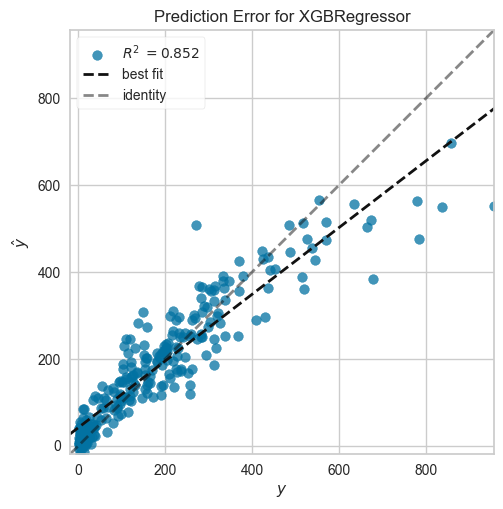

In [24]:
exp1.plot_model(tune_xgboost,plot='error')

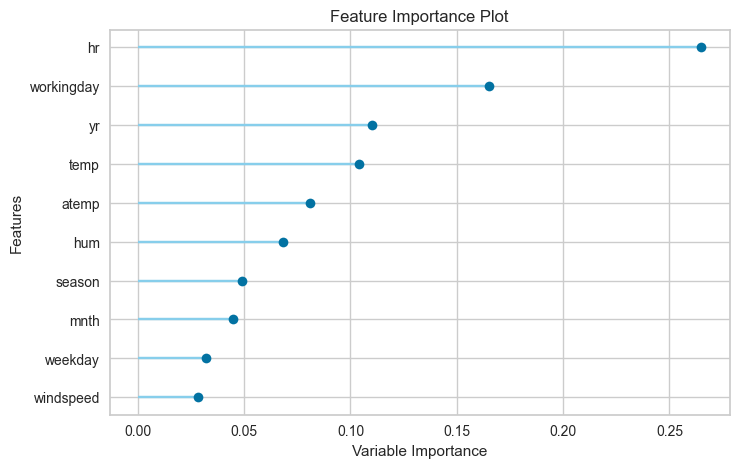

In [25]:
exp1.plot_model(tune_xgboost,plot='feature')


In [26]:
exp1.plot_model(tune_xgboost, plot = 'parameter')

,Parameters
objective,reg:squarederror
base_score,None
booster,gbtree
callbacks,None
colsample_bylevel,None
colsample_bynode,None
colsample_bytree,0.7
device,cpu
early_stopping_rounds,None
enable_categorical,False


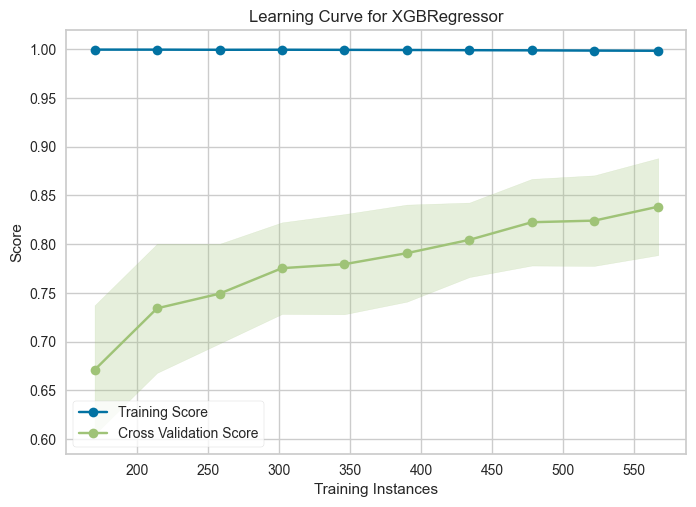

In [27]:
exp1.plot_model(tune_xgboost, plot = 'learning')

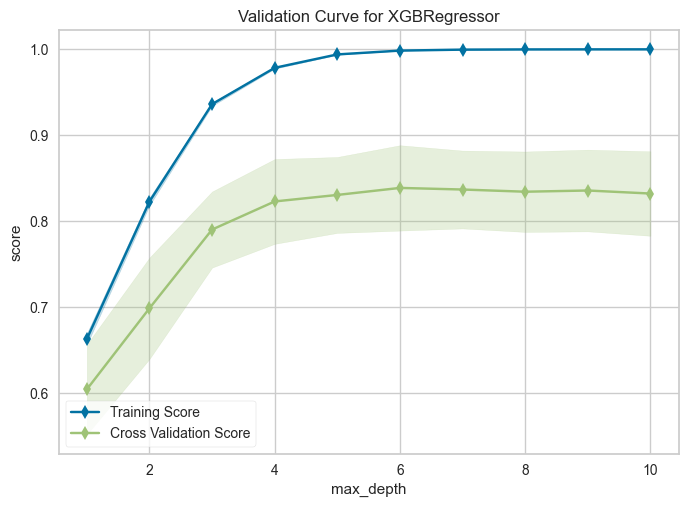

In [28]:
exp1.plot_model(tune_xgboost, plot = 'vc')

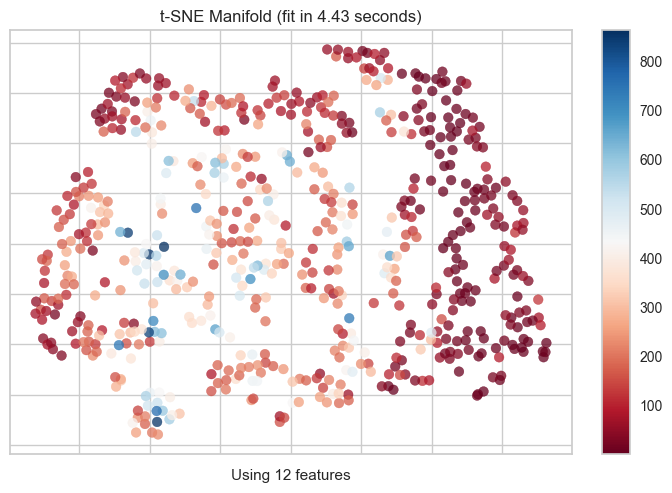

In [29]:
exp1.plot_model(tune_xgboost, plot = 'manifold')

In [30]:
lr = exp1.create_model('lr',fold=5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,102.7848,18012.6959,134.2114,0.3854,1.2219,3.4849
1,102.2579,17882.4933,133.7254,0.4194,1.1581,2.5787
2,108.0728,22379.1829,149.5967,0.4270,1.1806,3.0470
3,103.2836,19240.2115,138.7091,0.3343,1.3342,3.7298
4,123.3324,23537.3598,153.4189,0.3107,1.1722,2.4750
Mean,107.9463,20210.3887,141.9323,0.3754,1.2134,3.0631
Std,7.9685,2322.1800,8.0999,0.0460,0.0640,0.4905


In [31]:
exp1.evaluate_model(lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

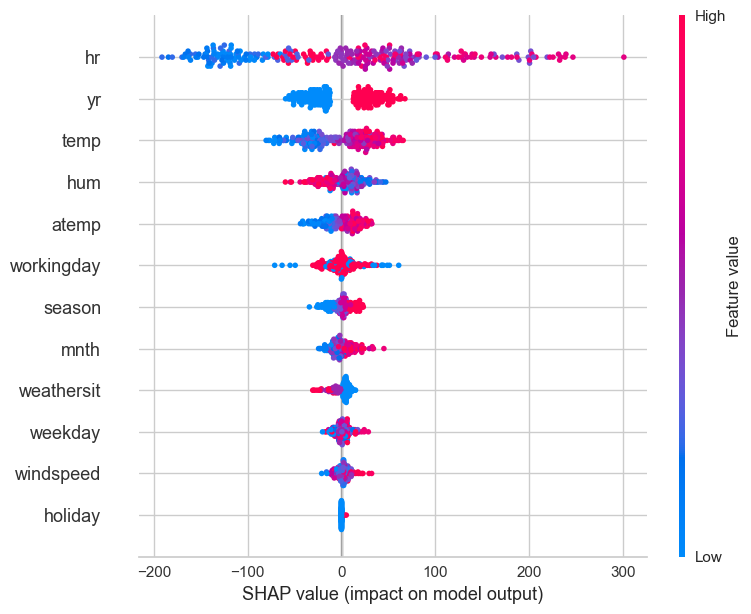

In [32]:
exp1.interpret_model(tune_xgboost)

In [33]:
dt = exp1.create_model('dt')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,51.8730,6735.4921,82.0700,0.7966,0.5417,0.5595
1,54.4762,9144.5714,95.6273,0.6359,0.5821,0.4948
2,75.3810,16110.0794,126.9255,0.5533,0.8370,1.1657
3,64.7619,11901.0159,109.0918,0.5338,0.5527,0.5243
4,83.1270,19903.5714,141.0800,0.5645,0.6135,0.6017
5,63.7143,11291.6825,106.2623,0.6474,0.6732,0.6973
6,64.3333,10817.8571,104.0089,0.5975,0.6146,0.7516
7,74.9048,13563.2857,116.4615,0.5590,0.7418,1.0336
8,64.6032,8401.3651,91.6590,0.7069,0.6551,0.4643


In [34]:
bagged_dt = exp1.ensemble_model(dt)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,54.5556,5809.3654,76.2192,0.8246,0.5533,0.6037
1,37.8111,3365.1722,58.0101,0.8660,0.4351,0.4666
2,52.0794,8951.2419,94.6110,0.7518,0.6214,0.8129
3,51.8619,6192.1592,78.6903,0.7574,0.4625,0.4554
4,60.4746,10007.8643,100.0393,0.7810,0.5585,0.6287
5,62.4381,10452.4178,102.2371,0.6736,0.6103,0.6940
6,56.0095,6086.8178,78.0181,0.7735,0.5904,0.7349
7,53.7905,5641.2267,75.1081,0.8166,0.5428,0.6827
8,61.2937,8619.6589,92.8421,0.6993,0.4993,0.5103


In [35]:
boosted_dt = exp1.ensemble_model(dt,method='Boosting')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,66.8571,10454.4762,102.2471,0.6843,0.6690,0.7372
1,39.2540,3606.3333,60.0528,0.8564,0.5198,0.4214
2,58.6984,7949.2063,89.1583,0.7796,0.6364,0.7976
3,53.2063,7158.2857,84.6067,0.7196,0.4775,0.4449
4,58.2063,9035.0635,95.0530,0.8023,0.4584,0.4546
5,64.0000,11385.9683,106.7051,0.6444,0.6669,0.8320
6,62.2540,9543.5556,97.6911,0.6449,0.5924,0.7152
7,55.2063,6618.4127,81.3536,0.7848,0.5476,0.6278
8,73.1270,11442.6508,106.9703,0.6008,0.5622,0.5805


In [36]:
blender = exp1.blend_models(estimator_list=top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.9190,4010.9832,63.3323,0.8789,0.4813,0.5141
1,30.1653,2467.6602,49.6755,0.9017,0.5912,0.6325
2,49.2106,6260.2494,79.1217,0.8264,0.6109,0.8180
3,43.8942,5690.1283,75.4329,0.7771,0.5400,0.6685
4,48.5256,7189.5750,84.7914,0.8427,0.4308,0.4860
5,51.1386,6118.3756,78.2200,0.8089,0.6140,0.7962
6,45.2958,4383.0092,66.2043,0.8369,0.5771,0.6725
7,48.9153,4907.1485,70.0510,0.8404,0.5434,0.7192
8,50.7141,5797.4883,76.1412,0.7977,0.5113,0.5773


In [37]:
blender

VotingRegressor(estimators=[('Extreme Gradient Boosting',
                             XGBRegressor(base_score=None, booster='gbtree',
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device='cpu',
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_const...
                                          max_delta_step=None, max_depth=None,
                                          max_leaves=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=-1,
                                          num_parallel_tree=None,
                                          random_state=555, ...)),
                            ('Extra Trees Regressor',
                             ExtraTreesRegressor(n_jobs=-1, random_state=555)),
                            ('Light Gradient Boosting Machine',
                             LGBMRegressor(n_jobs=-1, random_state=555))],
                n_jobs=-1)

In [38]:
stacker = exp1.stack_models(estimator_list=top3_exp1)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,43.5589,3663.7599,60.5290,0.8894,0.5542,0.4808
1,31.4909,2511.5263,50.1151,0.9000,0.5840,0.7237
2,49.2787,5939.0955,77.0655,0.8353,0.6859,0.7434
3,43.7369,6133.3716,78.3158,0.7597,0.4511,0.4989
4,51.3337,6975.1875,83.5176,0.8474,0.6125,0.7187
5,50.8132,6009.3335,77.5199,0.8123,0.7994,0.8933
6,45.0438,4492.9779,67.0297,0.8328,0.5807,0.7614
7,50.7933,4994.8317,70.6741,0.8376,0.6462,0.9185
8,50.6646,5968.4554,77.2558,0.7918,0.5998,0.4187


In [39]:
stacker

StackingRegressor(cv=5,
                  estimators=[('Extreme Gradient Boosting',
                               XGBRegressor(base_score=None, booster='gbtree',
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device='cpu',
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interactio...
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=-1,
                                            num_parallel_tree=None,
                                            random_state=555, ...)),
                              ('Extra Trees Regressor',
                               ExtraTreesRegressor(n_jobs=-1,
                                                   random_state=555)),
                              ('Light Gradient Boosting Machine',
                               LGBMRegressor(n_jobs=-1, random_state=555))],
                  final_estimator=LinearRegression(n_jobs=-1), n_jobs=-1)

In [40]:
xgboost = exp1.create_model('xgboost')
stacker_xgboost = exp1.stack_models(top3_exp1,meta_model=xgboost)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45.0018,3758.3747,61.3056,0.8865,0.5075,0.5191
1,36.8450,3642.8429,60.3560,0.8550,0.6769,0.8609
2,52.1643,7224.6711,84.9981,0.7997,0.6896,0.9332
3,45.7195,5665.3274,75.2684,0.7781,0.5548,0.7064
4,51.4061,7638.4734,87.3984,0.8329,0.4752,0.5699
5,53.3470,6658.2799,81.5983,0.7921,0.6452,1.0225
6,49.0196,4950.8783,70.3625,0.8158,0.5864,0.6771
7,48.4646,5064.8407,71.1677,0.8353,0.6300,0.9826
8,51.5512,7002.2337,83.6794,0.7557,0.4271,0.4067


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,53.7297,5869.5342,76.6129,0.8228,0.5104,0.4995
1,41.0986,4001.8235,63.2600,0.8407,0.5475,0.5603
2,58.4729,8764.5447,93.6191,0.7570,0.6191,0.6773
3,60.9391,11791.1690,108.5871,0.5381,0.6141,0.8139
4,62.7613,12514.9555,111.8703,0.7262,0.5112,0.4737
5,58.5528,7345.6554,85.7068,0.7706,0.6579,0.7805
6,52.2174,5901.0677,76.8184,0.7804,0.6067,0.6934
7,57.4106,7638.6425,87.3993,0.7516,0.5087,0.5712
8,59.5705,7321.1620,85.5638,0.7446,0.5249,0.5673


In [42]:
# we already have top3_expr1, blender and stacker so far. Let's make tuned_top3_expr1 and pick the best one

tuned_top3_expr = [exp1.tune_model(i) for i in top3_exp1]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,44.4806,3216.6901,56.7159,0.9029,0.6393,0.7751
1,33.9362,2829.6637,53.1946,0.8873,0.6915,0.8382
2,53.2781,6610.5681,81.3054,0.8167,0.7367,1.1089
3,45.7133,5733.8859,75.7224,0.7754,0.5873,0.7585
4,47.7432,6131.5154,78.3040,0.8658,0.5785,0.5796
5,53.3372,6304.9406,79.4037,0.8031,0.8316,1.2129
6,40.9460,3182.7310,56.4157,0.8816,0.5194,0.6099
7,48.4118,4314.5901,65.6855,0.8597,0.7451,1.0565
8,46.5836,4281.5601,65.4336,0.8506,0.5604,0.6348


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.4034,8151.6202,90.2863,0.7538,0.6862,0.9139
1,39.9741,3589.5322,59.9127,0.8571,0.5479,0.6773
2,54.7390,9397.5107,96.9408,0.7394,0.7114,1.0725
3,54.5383,5799.8040,76.1564,0.7728,0.5613,0.6643
4,70.7849,14816.7063,121.7239,0.6758,0.6375,0.7618
5,61.5880,9106.9632,95.4304,0.7156,0.7370,1.1491
6,58.5509,6972.2480,83.5000,0.7406,0.6666,0.9417
7,62.2674,8971.3315,94.7171,0.7083,0.6185,0.8338
8,62.8615,7876.5725,88.7501,0.7252,0.6088,0.7755


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,65.6575,7847.5915,88.5866,0.7630,0.9988,1.0603
1,51.2905,4461.7450,66.7963,0.8223,0.7847,1.3460
2,59.2497,6982.9549,83.5641,0.8064,0.8735,1.7424
3,56.4898,6916.4077,83.1649,0.7291,0.8083,1.1854
4,61.3623,7755.3968,88.0647,0.8303,0.9037,1.0623
5,60.7631,6807.7997,82.5094,0.7874,1.0090,1.8986
6,63.2738,7809.5118,88.3714,0.7094,0.7312,1.0992
7,65.4989,6968.5122,83.4776,0.7734,0.9734,2.4809
8,69.2179,10451.8377,102.2342,0.6354,0.8463,1.2086


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [43]:
best_R2_model = exp1.automl(optimize='R2')


In [44]:
holdout_pred = exp1.predict_model(stacker)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,43.2523,5214.0514,72.2084,0.8330,0.5281,0.7204


In [45]:
final_stacker = exp1.finalize_model(stacker)

In [46]:
final_stacker

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 StackingRegressor(cv=5,
                                   estimators=[('Extreme Gradient Boosting',
                                                XGBRegressor(base_score=None,
                                                             booster='gbtree',
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device='cpu',
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metr...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=555, ...)),
                                               ('Extra Trees Regressor',
                                                ExtraTreesRegressor(n_jobs=-1,
                                                                    random_state=555)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=555))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])

In [47]:
unseen_predictions = exp1.predict_model(final_stacker, data=data_unseen)
unseen_predictions.tail()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,38.5145,2992.9836,54.7082,0.8734,0.7230,0.9091


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,prediction_label
95,8129,12/10/2011,4,0,12,8,0,6,0,1,0.26,0.2727,0.65,0.1343,73,166.937485
96,12465,6/8/2012,2,1,6,13,0,5,1,1,0.74,0.6515,0.37,0.2537,416,379.386469
97,6769,10/14/2011,4,0,10,14,0,5,1,1,0.62,0.6212,0.43,0.3582,156,246.182388
98,7732,11/23/2011,4,0,11,18,0,3,1,2,0.40,0.4091,0.58,0.5224,145,292.382893
99,5225,8/10/2011,3,0,8,14,0,3,1,1,0.84,0.7273,0.34,0.3284,178,172.645571


In [48]:
exp1.save_model(final_stacker, 'my_pycaret_regression')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('placeholder', None),
                 ('actual_estimator',
                  StackingRegressor(cv=5,
                                    estimators=[('Extreme Gradient Boosting',
                                                 XGBRegressor(base_score=None,
                                                              booster='gbtree',
                                                              callbacks=None,
                                                              colsample_bylevel=None,
                                                              colsample_bynode=None,
                                                              colsample_bytree=None,
                                                              device='cpu',
                                                              early_stopping_rounds=None,
                                                              enable_categorical=False,
               

In [49]:
my_winning_regressor = load_model('my_pycaret_regression')

Transformation Pipeline and Model Successfully Loaded


In [50]:
my_winning_regressor

Pipeline(memory=Memory(location=None),
         steps=[('placeholder', None),
                ('actual_estimator',
                 StackingRegressor(cv=5,
                                   estimators=[('Extreme Gradient Boosting',
                                                XGBRegressor(base_score=None,
                                                             booster='gbtree',
                                                             callbacks=None,
                                                             colsample_bylevel=None,
                                                             colsample_bynode=None,
                                                             colsample_bytree=None,
                                                             device='cpu',
                                                             early_stopping_rounds=None,
                                                             enable_categorical=False,
                                                             eval_metr...
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             multi_strategy=None,
                                                             n_estimators=None,
                                                             n_jobs=-1,
                                                             num_parallel_tree=None,
                                                             random_state=555, ...)),
                                               ('Extra Trees Regressor',
                                                ExtraTreesRegressor(n_jobs=-1,
                                                                    random_state=555)),
                                               ('Light Gradient Boosting '
                                                'Machine',
                                                LGBMRegressor(n_jobs=-1,
                                                              random_state=555))],
                                   final_estimator=LinearRegression(n_jobs=-1),
                                   n_jobs=-1))])